# Lấy data từ website grouplens và giải nén, không cần kết nối drive

**- Giải nén file**

In [10]:
DATASET_LINK='http://files.grouplens.org/datasets/movielens/ml-100k.zip'
!wget -nc http://files.grouplens.org/datasets/movielens/ml-100k.zip
!unzip -n ml-100k.zip

File ‘ml-100k.zip’ already there; not retrieving.

Archive:  ml-100k.zip


In [11]:
#adding library
import numpy as np

import pandas as pd

**- Xem file u.data**

In [12]:
column_names1 = ['user id','movie id','rating','timestamp']
dataset = pd.read_csv('ml-100k/u.data', sep='\t',header=None,names=column_names1)
dataset.head() 

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


# Check data infomation, datatype, file formation, seperate character

In [19]:
#adding library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [20]:
#add data from drive
#from google.colab import drive
#drive.mount('/content/drive')

In [21]:
#get data into data frame, then check data (u.data)
df  = pd.read_csv("ml-100k/u.data", sep='\t', names=['user_id','item_id','rating','timestamp'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user_id    100000 non-null  int64
 1   item_id    100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [22]:
#check min, max rating and count how many the distincts value
print("rating:")
print(df.rating.max())
print(df.rating.min())
print(df.rating.value_counts())

#check how many the distincts value of users id
print("user:")
print(df.user_id.value_counts())
#check how many the distincts value of video
print("video:")
print(df.item_id.value_counts())

rating:
5
1
4    34174
3    27145
5    21201
2    11370
1     6110
Name: rating, dtype: int64
user:
405    737
655    685
13     636
450    540
276    518
      ... 
441     20
36      20
812     20
895     20
93      20
Name: user_id, Length: 943, dtype: int64
video:
50      583
258     509
100     508
181     507
294     485
       ... 
852       1
1505      1
1653      1
1452      1
1641      1
Name: item_id, Length: 1682, dtype: int64


In [23]:
df['rating'].describe()

count    100000.000000
mean          3.529860
std           1.125674
min           1.000000
25%           3.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

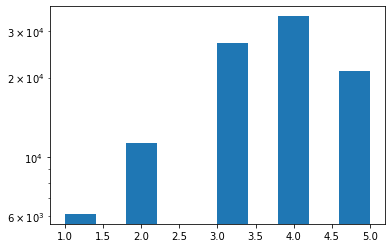

In [24]:
plt.hist(df['rating'],log=True);
plt.plot();
plt.show();

# Offline phase - Caculate the similarity



***- Thêm thư viện - kết nối drive để lấy dữ liệu***

In [25]:
#Thêm thư viện, thêm đường dẫn lấy dữ liệu
#from google.colab import drive
#drive.mount('/content/drive')
DATASET_LINK='http://files.grouplens.org/datasets/movielens/ml-100k.zip'
!wget -nc http://files.grouplens.org/datasets/movielens/ml-100k.zip
!unzip -n ml-100k.zip
import numpy as np

import pandas as pd

File ‘ml-100k.zip’ already there; not retrieving.

Archive:  ml-100k.zip


***- Lấy dữ liệu***

In [26]:
## Lấy dữ liệu từ file u.data và lọc dữ liệu (xóa duplicate, null, NaN)
movieDataRating  = pd.read_csv("ml-100k/u.data", 
                               sep='\t', names=['user_id','movie_id','rating','timestamp'])
movieDataRating.dropna(inplace=True)
movieDataRating.drop_duplicates(inplace=True)
## Lấy dữ liệu gồm title, id phim từ u.item và lọc
col = 'movie id | movie title | release date | video release date | IMDb URL | unknown | Action '
col+= '| Adventure | Animation | Children | Comedy | Crime | Documentary | Drama | Fantasy | Film-Noir '
col+= '| Horror | Musical | Mystery | Romance | Sci-Fi | Thriller | War | Western'
colItem = col.split(' | ')
movieItem = pd.read_csv('ml-100k/u.item', 
                        sep='|',header=None,names=colItem,encoding='latin-1')
movieItem = movieItem[['movie id','movie title']]
movieItem.dropna(inplace=True)
movieItem.drop_duplicates(inplace=True)

***- Chuyển dataframe thành ma trận user-item rating. Cột là các user id, dòng là các movie id***

In [27]:
## Chuyển dataframe thành ma trận user-item rating. Cột là các user id, dòng là các movie id
## Dùng hàm pivot chuyển dataframe thành bảng. Hàm fillna() dùng để thay các giá trị NaN, Null bằng 0
movieRatingMatrix = movieDataRating.pivot(
    index='movie_id',
     columns='user_id',
      values='rating').fillna(0)
movieRatingMatrix

user_id,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
movie_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,4.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,4.0,...,2.0,3.0,4.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0
2,3.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
3,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,...,5.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
5,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1678,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1679,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


 ***- Chuyển ma trận thưa (nhiều giá trị 0) về ma trận dày đặt phục vụ cho việc dễ tính toán, giảm bộ nhớ lưu trữ.***

In [28]:
## Chuyển ma trận thưa (nhiều giá trị 0) về ma trận dày đặt phục vụ cho việc dễ tính toán, giảm bộ nhớ lưu trữ.
from scipy.sparse import csr_matrix

In [29]:
movieRatingDenseMatrix = csr_matrix(movieRatingMatrix.values)
movieRatingDenseMatrix

<1682x943 sparse matrix of type '<class 'numpy.float64'>'
	with 100000 stored elements in Compressed Sparse Row format>

***- Tạo ma trận tương đồng.
Loại tính toán tương đồng cho chính movie ở giai đoạn online (trong hàm lấy top k movie tương đồng nhất).
Movie id sẽ giảm xuống 1 đơn vị!***

In [30]:
#Tạo hàm xây dựng ma trận tương đồng
def createSimilarMoviesMatrix():
   amountMovie,amountUser=movieRatingMatrix.shape
   itemSimilarMatrix = []
   i,j=0,0
   while i < amountMovie:
     userRatedI = movieRatingDenseMatrix.getrow(i).indices.tolist()
     iScoreList = []
     while j < amountMovie:
       userRatedJ = movieRatingDenseMatrix.getrow(j).indices.tolist()
       union = len(set(userRatedI) | set(userRatedJ))
       intersection = len(set.intersection(set(userRatedI), set(userRatedJ)))
       score = intersection / union
       iScoreList.append(score)
       j+=1
     j=0
     itemSimilarMatrix.append(np.argsort(iScoreList))
     iScoreList.clear()
     i+=1
   return itemSimilarMatrix 

***- Ma trận gồm danh sách các movie tương đồng, sắp xếp theo thứ tự độ tương đồng tăng dần*** (train gần 4 phút)

In [31]:
## Ma trận gồm danh sách các movie tương đồng, sắp xếp theo thứ tự độ tương đồng tăng dần
similarRankingMatrix=createSimilarMoviesMatrix()

***- Kiểm thử:***

In [32]:
print('Số dòng ma trận movie tương đồng:',len(similarRankingMatrix))
movie1=similarRankingMatrix[0]
m=len(movie1)
print('Số cột ma trận movie tương đồng:',m)
print('Danh sách các movie id có độ tương đồng với movie 1 tăng dần:',movie1)
print('Top 5 movie tương đồng nhất với movie 1:',movie1[-5:])

Số dòng ma trận movie tương đồng: 1682
Số cột ma trận movie tương đồng: 1682
Danh sách các movie id có độ tương đồng với movie 1 tăng dần: [1568 1586 1587 ...  120   49    0]
Top 5 movie tương đồng nhất với movie 1: [116 180 120  49   0]


# Online phase - Recommend films
# Công thức Jarcard: tính độ tương đồng của 2 movie

***- Tạo hàm tính toán lấy danh sách movie tương đồng:***

In [33]:
## Tạo hàm tính toán lấy danh sách movie tương đồng
def getSimilarMovies(inputMovieId, n=10):
   return similarRankingMatrix[inputMovieId-1][-n-1:-1]

In [34]:
movieTopNSimilar=getSimilarMovies(1, 5)
print('Top 5 movie tương đồng nhất với movie 1:',movieTopNSimilar)

Top 5 movie tương đồng nhất với movie 1: [ 99 116 180 120  49]


***- Tính bias của một user***

In [35]:
# Tính bias của một user =  trung bình tất cả các rating đã đánh
def calBiasUser(inputUserId):
  k=movieRatingDenseMatrix.getcol(inputUserId-1).toarray()
  count=0
  mean=0
  for i in k:
    if i[0] != 0:
      mean=mean+i[0]
      count+=1
  mean=mean/count
  return mean

print('Bias của user 5:', calBiasUser(1))

Bias của user 5: 3.610294117647059


***- Hàm tính sim***

In [36]:
#Hàm tính độ tương đồng của 2 phim, đầu vào là 2 id, đầu ra là độ tương đồng (float)
def calSimMovie(movieId1, movieId2):
  userRated1 = movieRatingDenseMatrix.getrow(movieId1-1).indices.tolist()
  userRated2 = movieRatingDenseMatrix.getrow(movieId2-1).indices.tolist()
  union = len(set(userRated1) | set(userRated2))
  intersection = len(set.intersection(set(userRated1), set(userRated2)))
  return intersection / union
print('Check hàm - Độ tương đồng của phim 1 với phim 1:', calSimMovie(1,1))
print('Độ tương đồng của phim 1 với phim 2:', calSimMovie(1,2))

Check hàm - Độ tương đồng của phim 1 với phim 1: 1.0
Độ tương đồng của phim 1 với phim 2: 0.21711899791231734


***- Tính tử số và mẫu số cho công thức dự đoán rating của một phim mà người xem có thể đánh giá phim như thế***

In [37]:
# Tính tử số và mẫu số cho công thức dự đoán rating của một phim mà người xem có thể đánh giá phim như thế
def calNumerator(idUser, idMovie, movies, bias):
  num=0
  for i in movies:
    rating=movieRatingMatrix[idUser][i+1]
    sim=calSimMovie(idMovie,i)
    num+=(sim * (rating-bias))
  return num

def calDenominator(idMovie, movies):
  den=0
  for i in movies:
    sim=calSimMovie(idMovie,i)
    den+=sim
  return den

***- Hàm Predict rating movie:***

In [38]:
# predict rating movie
def predictRatingMovie(inputUserId, inputMovieId, k=10):
  movieSims=getSimilarMovies(inputMovieId, k)
  bias=calBiasUser(inputUserId)
  num=calNumerator(inputUserId, inputMovieId, movieSims, bias)
  den=calDenominator(inputMovieId, movieSims)
  print('bias:',bias,'num:', num,'den:', den)
  return (bias + num/den)

***- Kiểm thử:***

In [39]:
user=1
movie=1
k=10
print('predict:', predictRatingMovie(user,movie,k))
print('truth:', movieRatingMatrix[user][movie])

bias: 3.610294117647059 num: 0.28056705257353093 den: 1.5218071872218446
predict: 3.7946585068609933
truth: 5.0


In [40]:
movieRatingMatrix

user_id,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
movie_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,4.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,4.0,...,2.0,3.0,4.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0
2,3.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
3,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,...,5.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
5,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1678,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1679,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
